In [1]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 20191125

@author: zhangji

test the linear relationship
U_t =?= U_sh + U_wm
U_t is the total velocity
U_sh is the velocity induced by shear flow
U_wm is the active velocity. 
"""

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
# from tqdm import tqdm_notebook as tqdm
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

import os
import glob
import re
import pandas as pd
from scanf import scanf
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate
from scipy import spatial
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
import importlib
from IPython.display import display, HTML
import pickle

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

from time import time
from src import support_class as spc
from src import jeffery_model as jm
from codeStore import support_fun as spf

# %matplotlib notebook

%matplotlib inline
rc('animation', html='html5')
fontsize = 40
figsize = (30, 16)
PWD = os.getcwd()

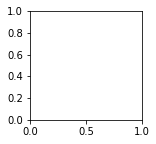

In [2]:
fig = plt.figure(figsize=(2, 2))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1)

In [3]:
def show_dPdt_pickle(pickle_name):
    with open('%s.pickle' % pickle_name, 'rb') as handle:
        pickle_data = pickle.load(handle)

    dPdt_data = []
    # ((psi, ((theta, phi, ui))))
    for tpsi, table_psi_data in pickle_data:
        t0 = []
        t0.append(tpsi)
        ttheta, tphi = np.meshgrid(*table_psi_data[0][:2], indexing='ij')
        tPx, tPy, tPz = (np.sin(ttheta) * np.cos(tphi), np.sin(ttheta) * np.sin(tphi), np.cos(ttheta))
        twx = table_psi_data[3][2].values
        twy = table_psi_data[4][2].values
        twz = table_psi_data[5][2].values
        tdPx = twy * tPz - twz * tPy
        tdPy = twz * tPx - twx * tPz
        tdPz = twx * tPy - twy * tPx
        t0.append([(*table_psi_data[0][:2], tdPx), (*table_psi_data[0][:2], tdPy), (*table_psi_data[0][:2], tdPz)])
        dPdt_data.append(t0)

    # reorgnize results
    dPdt_all = [[] for i in range(3)]
    for tpsi, table_psi_data in dPdt_data:
        for (ty, tx, tdPdt), dPdti in zip(table_psi_data, dPdt_all):
            dPdti.append((tpsi, ty, tx, tdPdt))

    # show results 
    for dPdti in dPdt_all[:]:
        t1 = []
        for _, _, _, tdPdt in dPdti:
            t1.append(np.nanmax(np.abs(tdPdt)))
        t1 = np.nanmax(t1) 
        fig = plt.figure(figsize=(80, 35))
        fig.patch.set_facecolor('white')
        axs = fig.subplots(nrows=3, ncols=5)
        for (tpsi, ty, tx, tdPdt), ax0 in zip(dPdti, axs.flatten()):
            levels = np.linspace(-t1, t1, 10)
            im = ax0.contourf(tx / np.pi, ty / np.pi, tdPdt, 
                              levels, cmap=plt.get_cmap('RdBu'))
            ax0.set_title('$\\psi=%f \pi$' % (tpsi / np.pi), fontsize=fontsize)
            ax0.set_xlabel('$\\phi / \pi$', fontsize=fontsize)
            ax0.set_ylabel('$\\theta / \pi$', fontsize=fontsize)
            fig.colorbar(im, ax=ax0, orientation='vertical').ax.tick_params(labelsize=fontsize)
            plt.sca(ax0)
            plt.xticks(fontsize=fontsize*0.8)
            plt.yticks(fontsize=fontsize*0.8)
        plt.tight_layout()
    return True

True

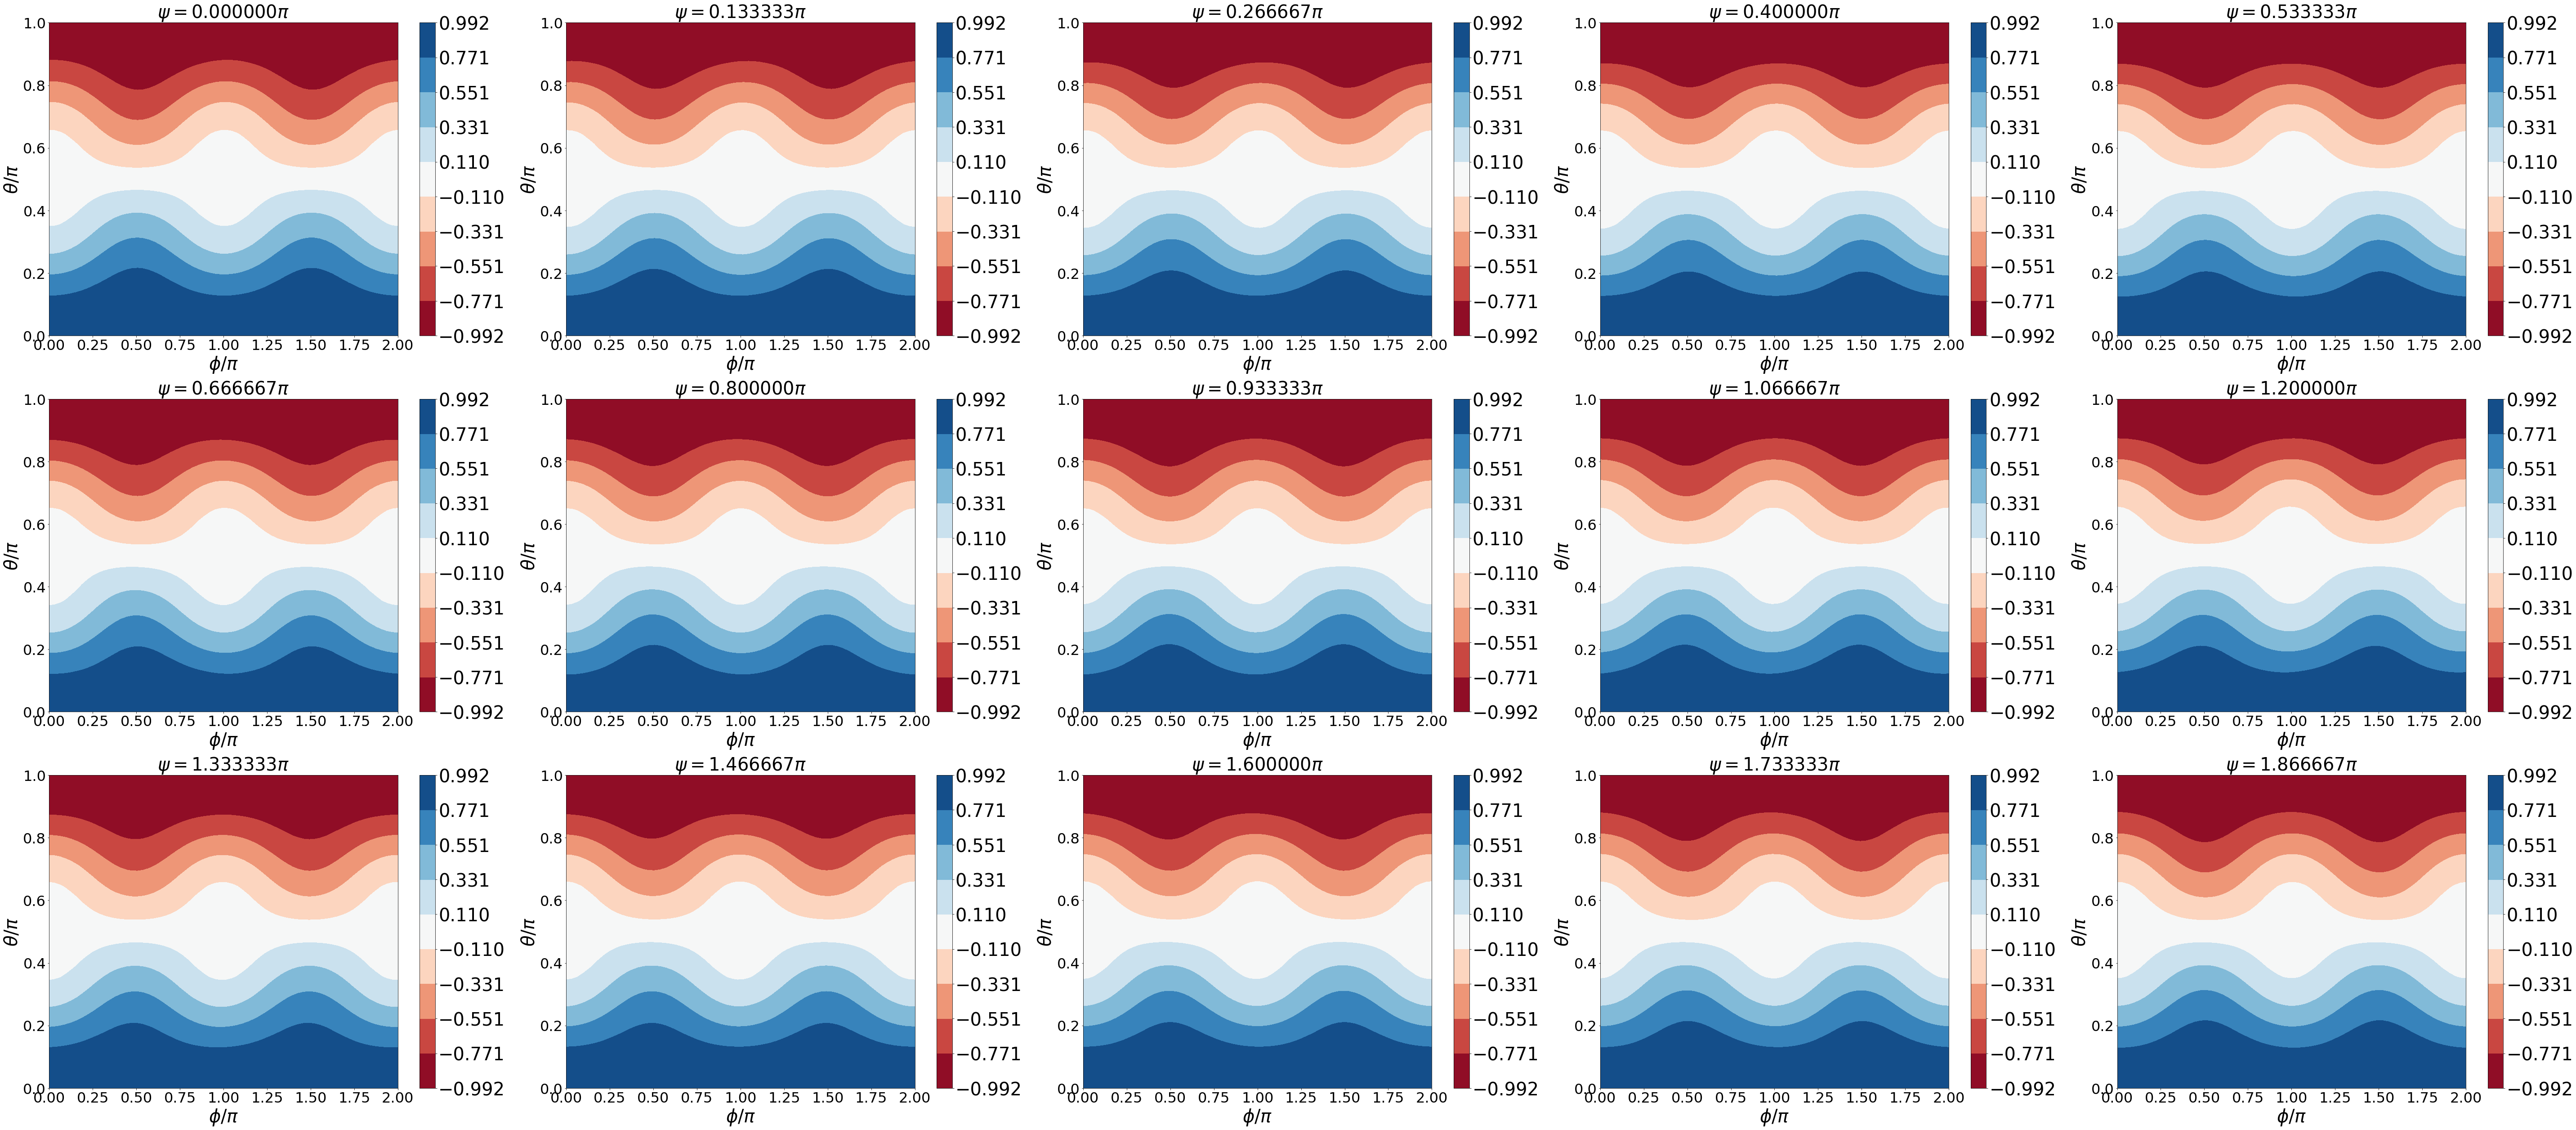

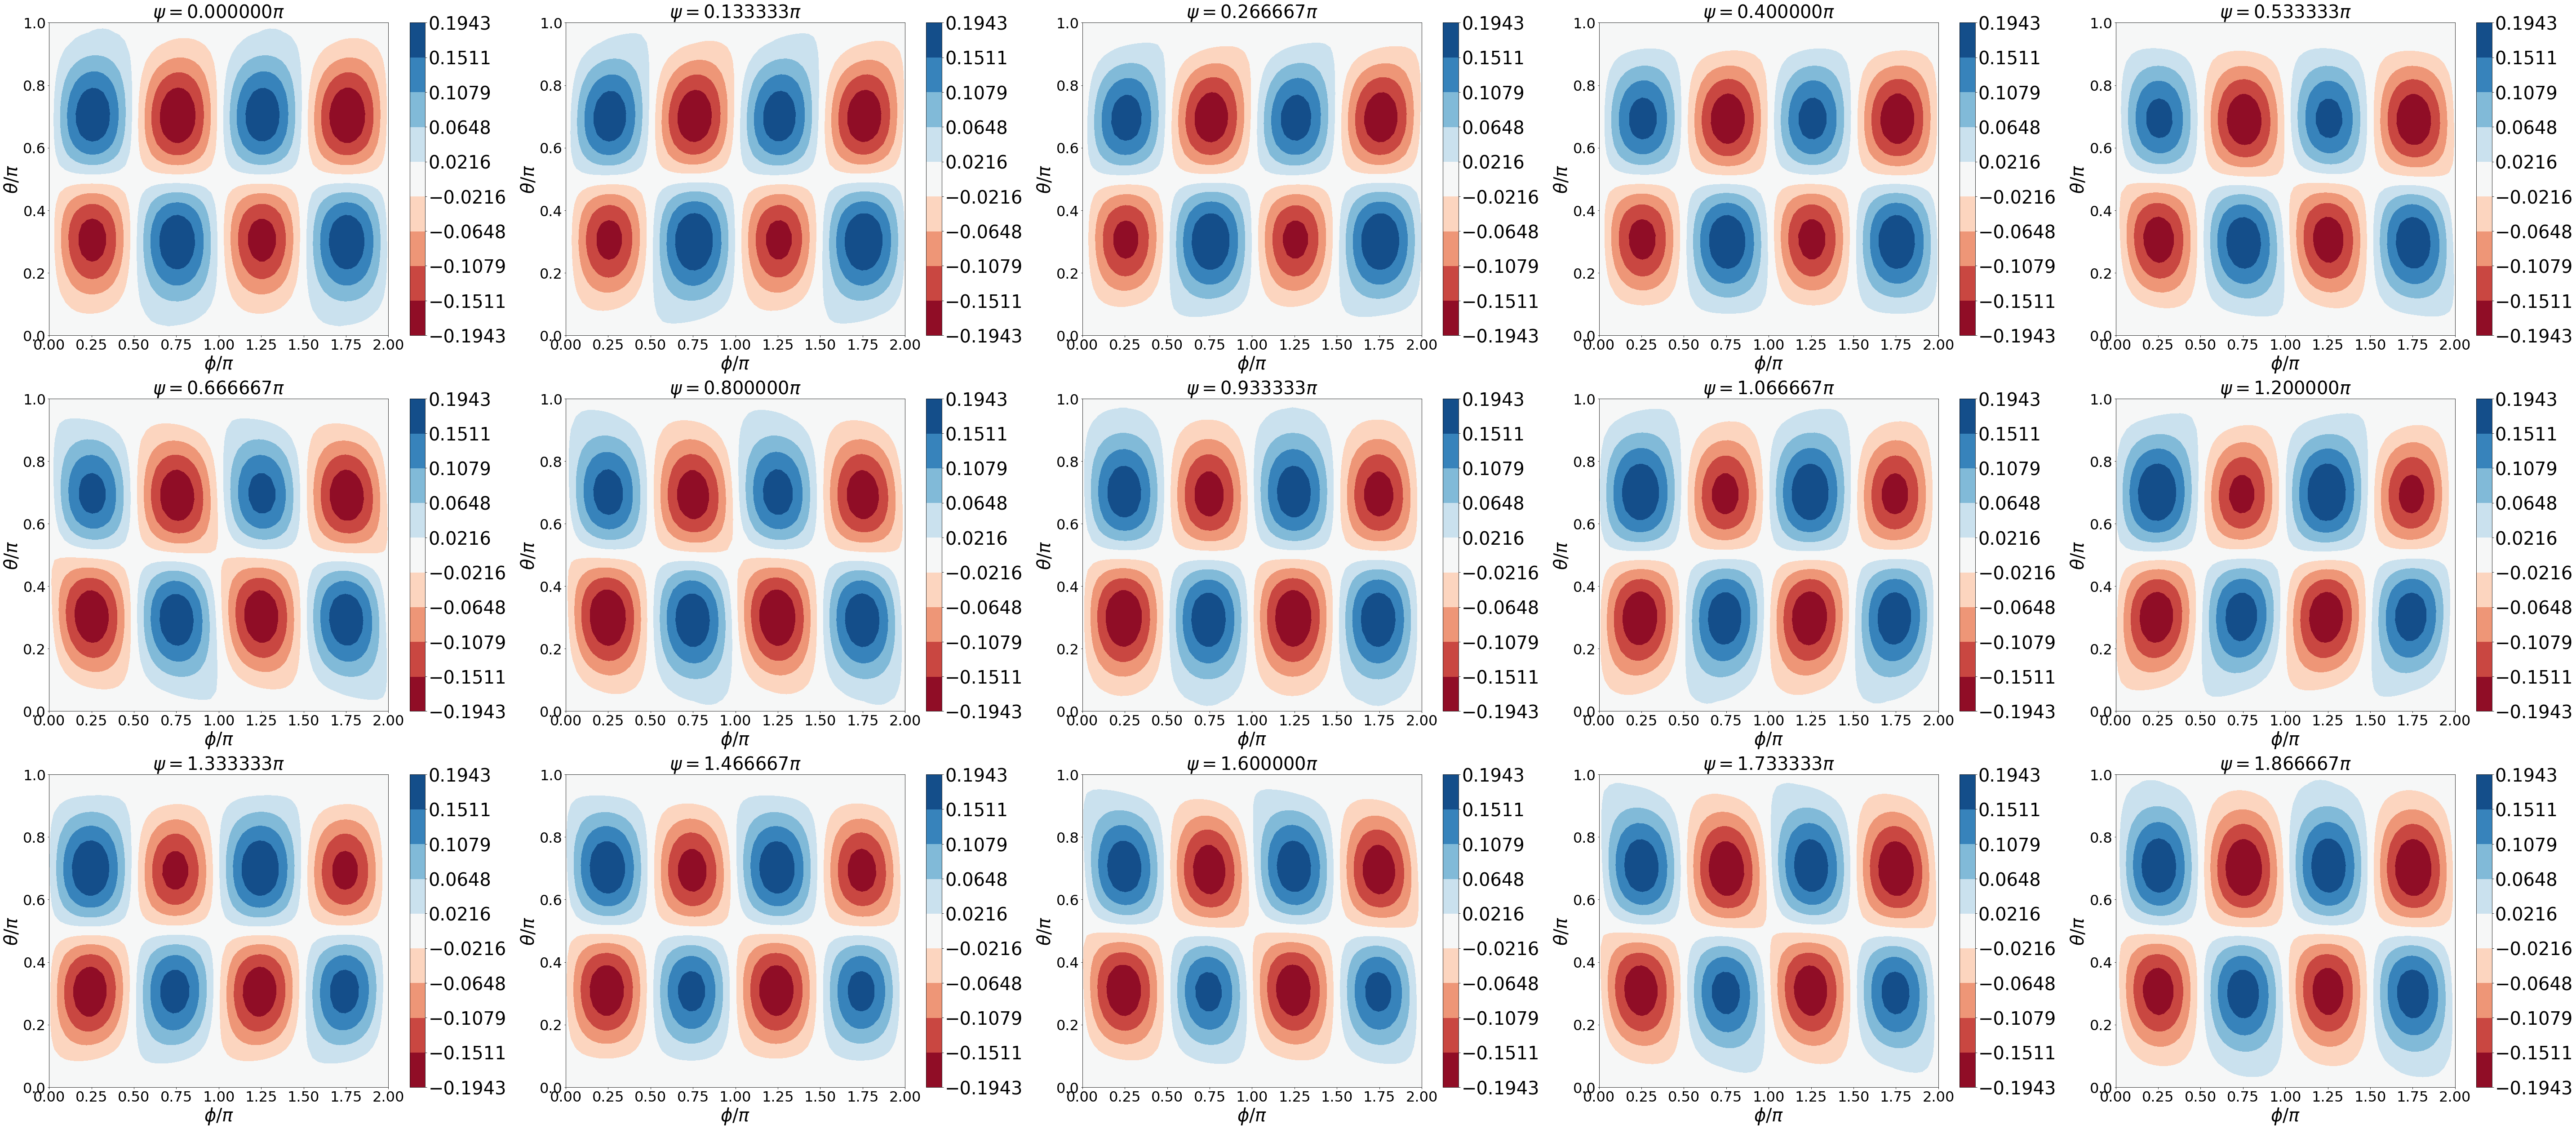

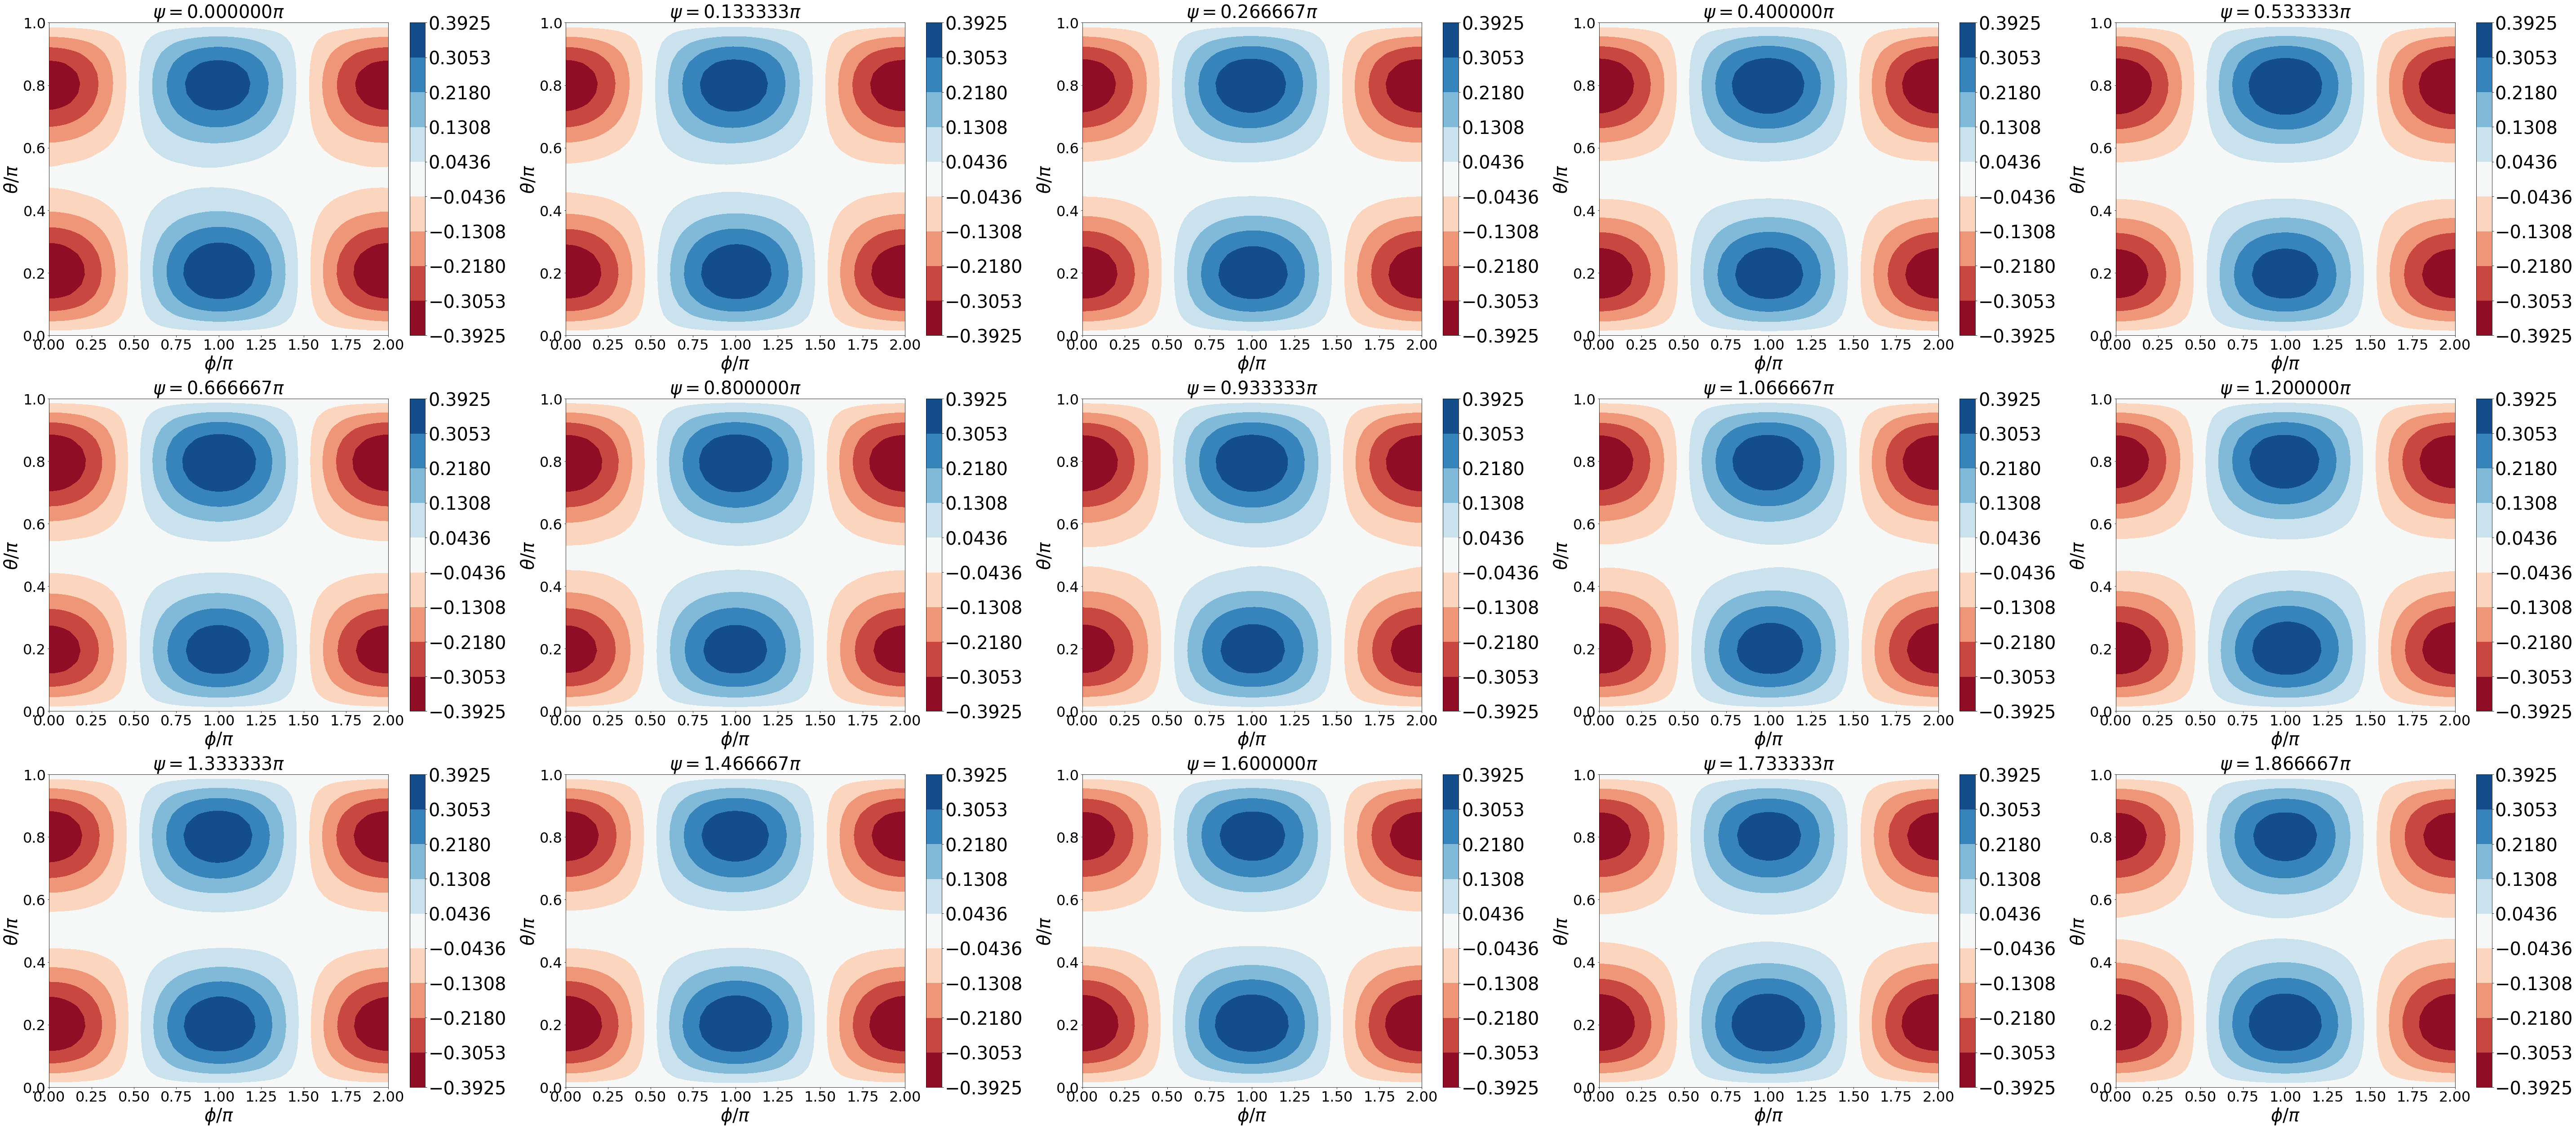

In [4]:
# show dPdt=w \times P of passive swimmer in shear flow, here P is the norm of swimmer. 
psv_pickle = 'ecoC01B05_tau1c_passive'
show_dPdt_pickle(psv_pickle)

True

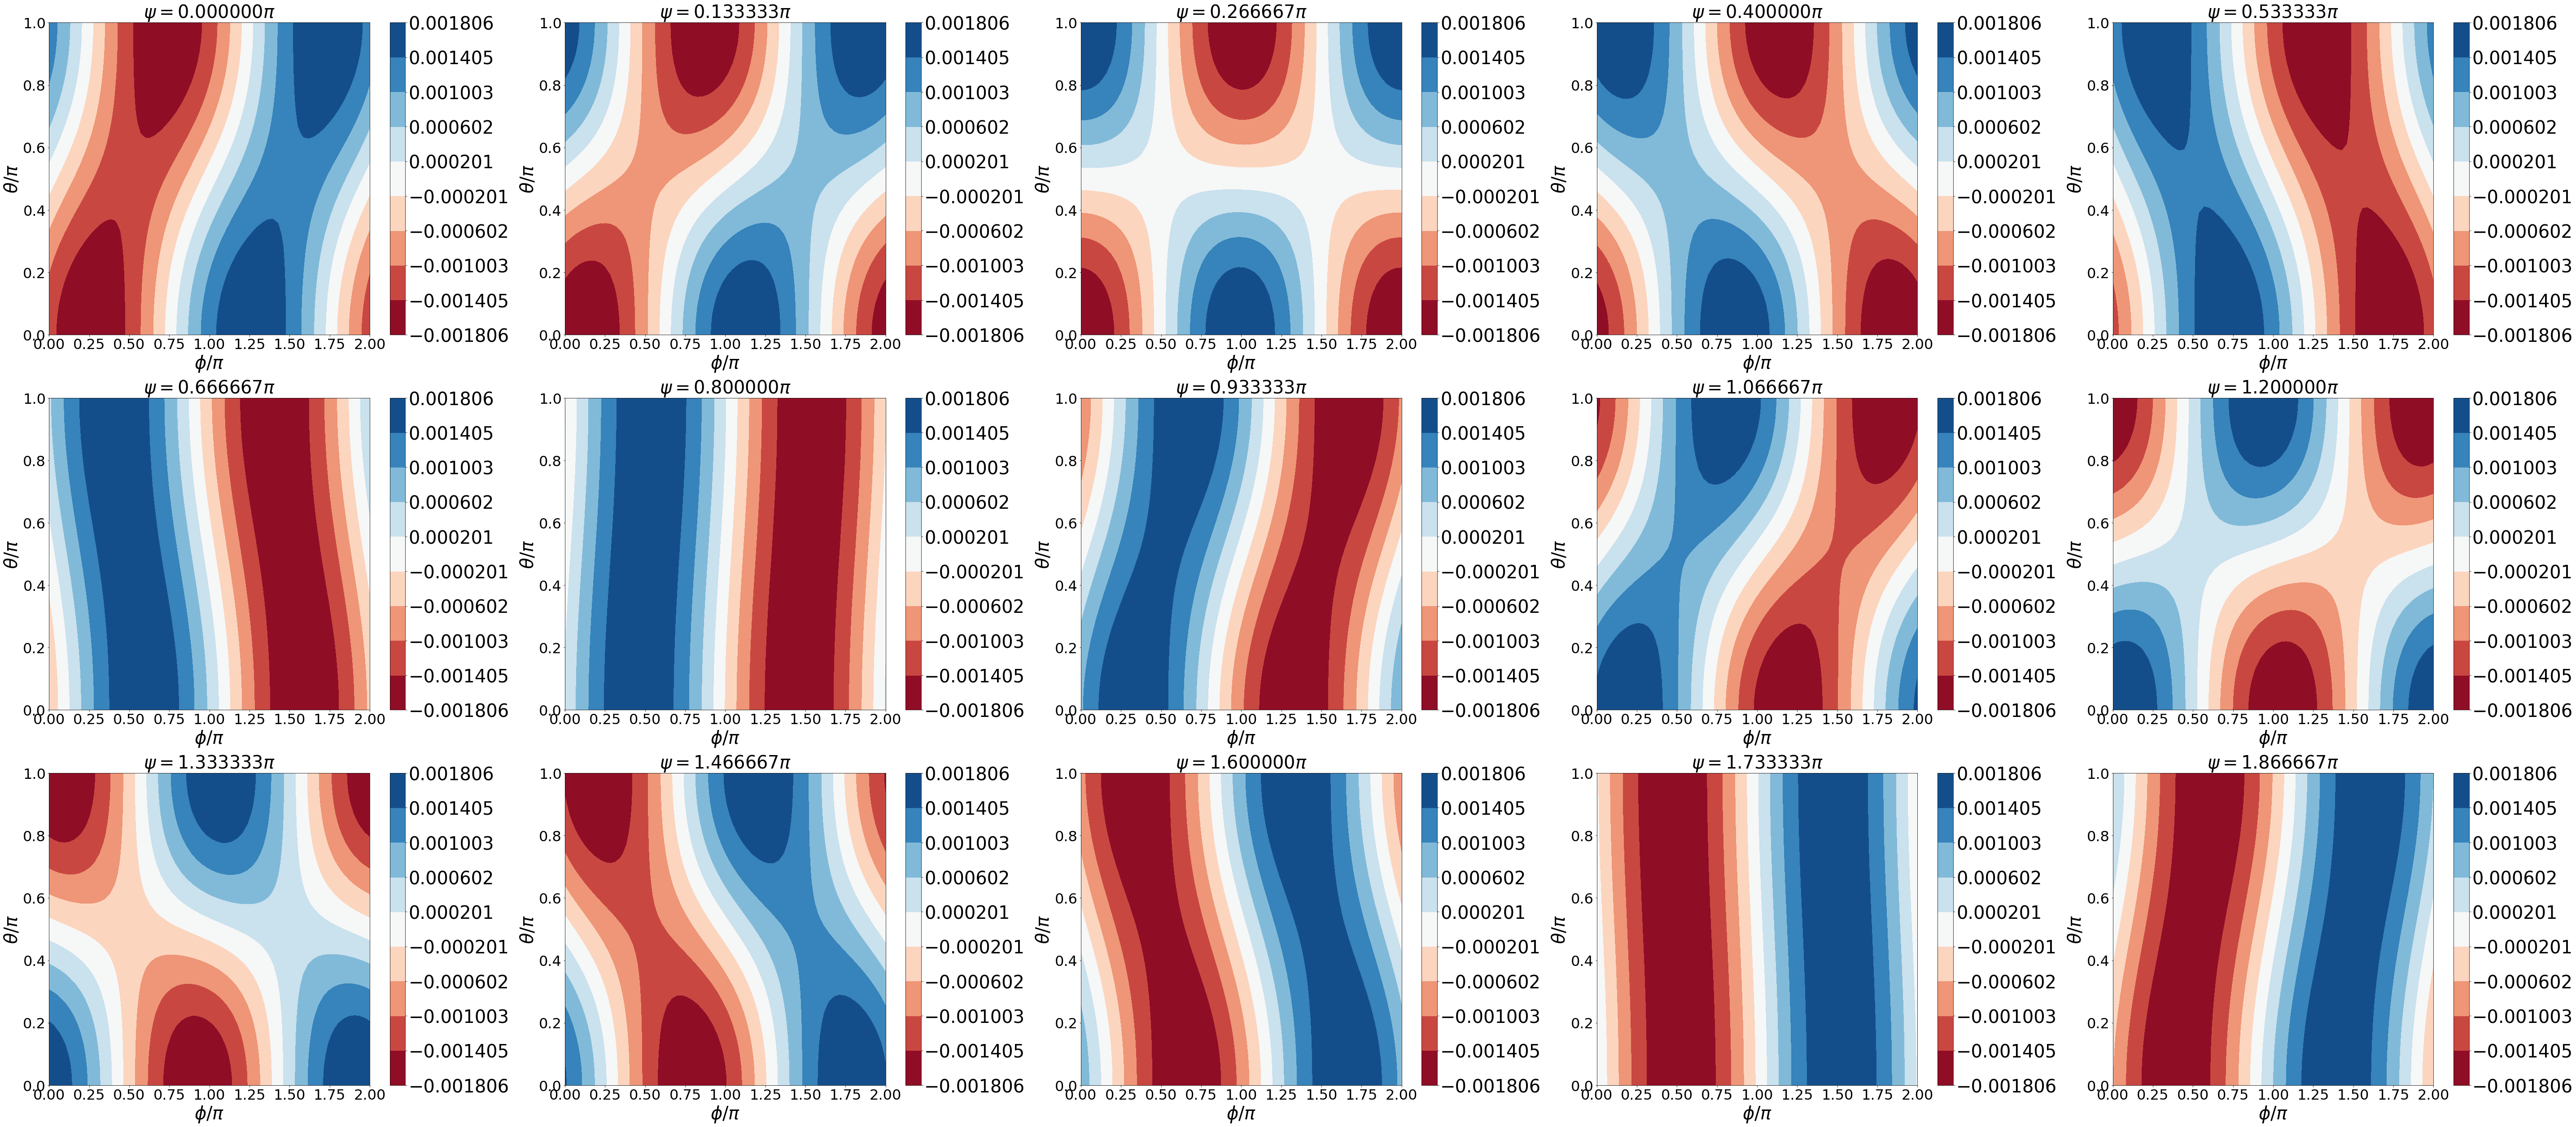

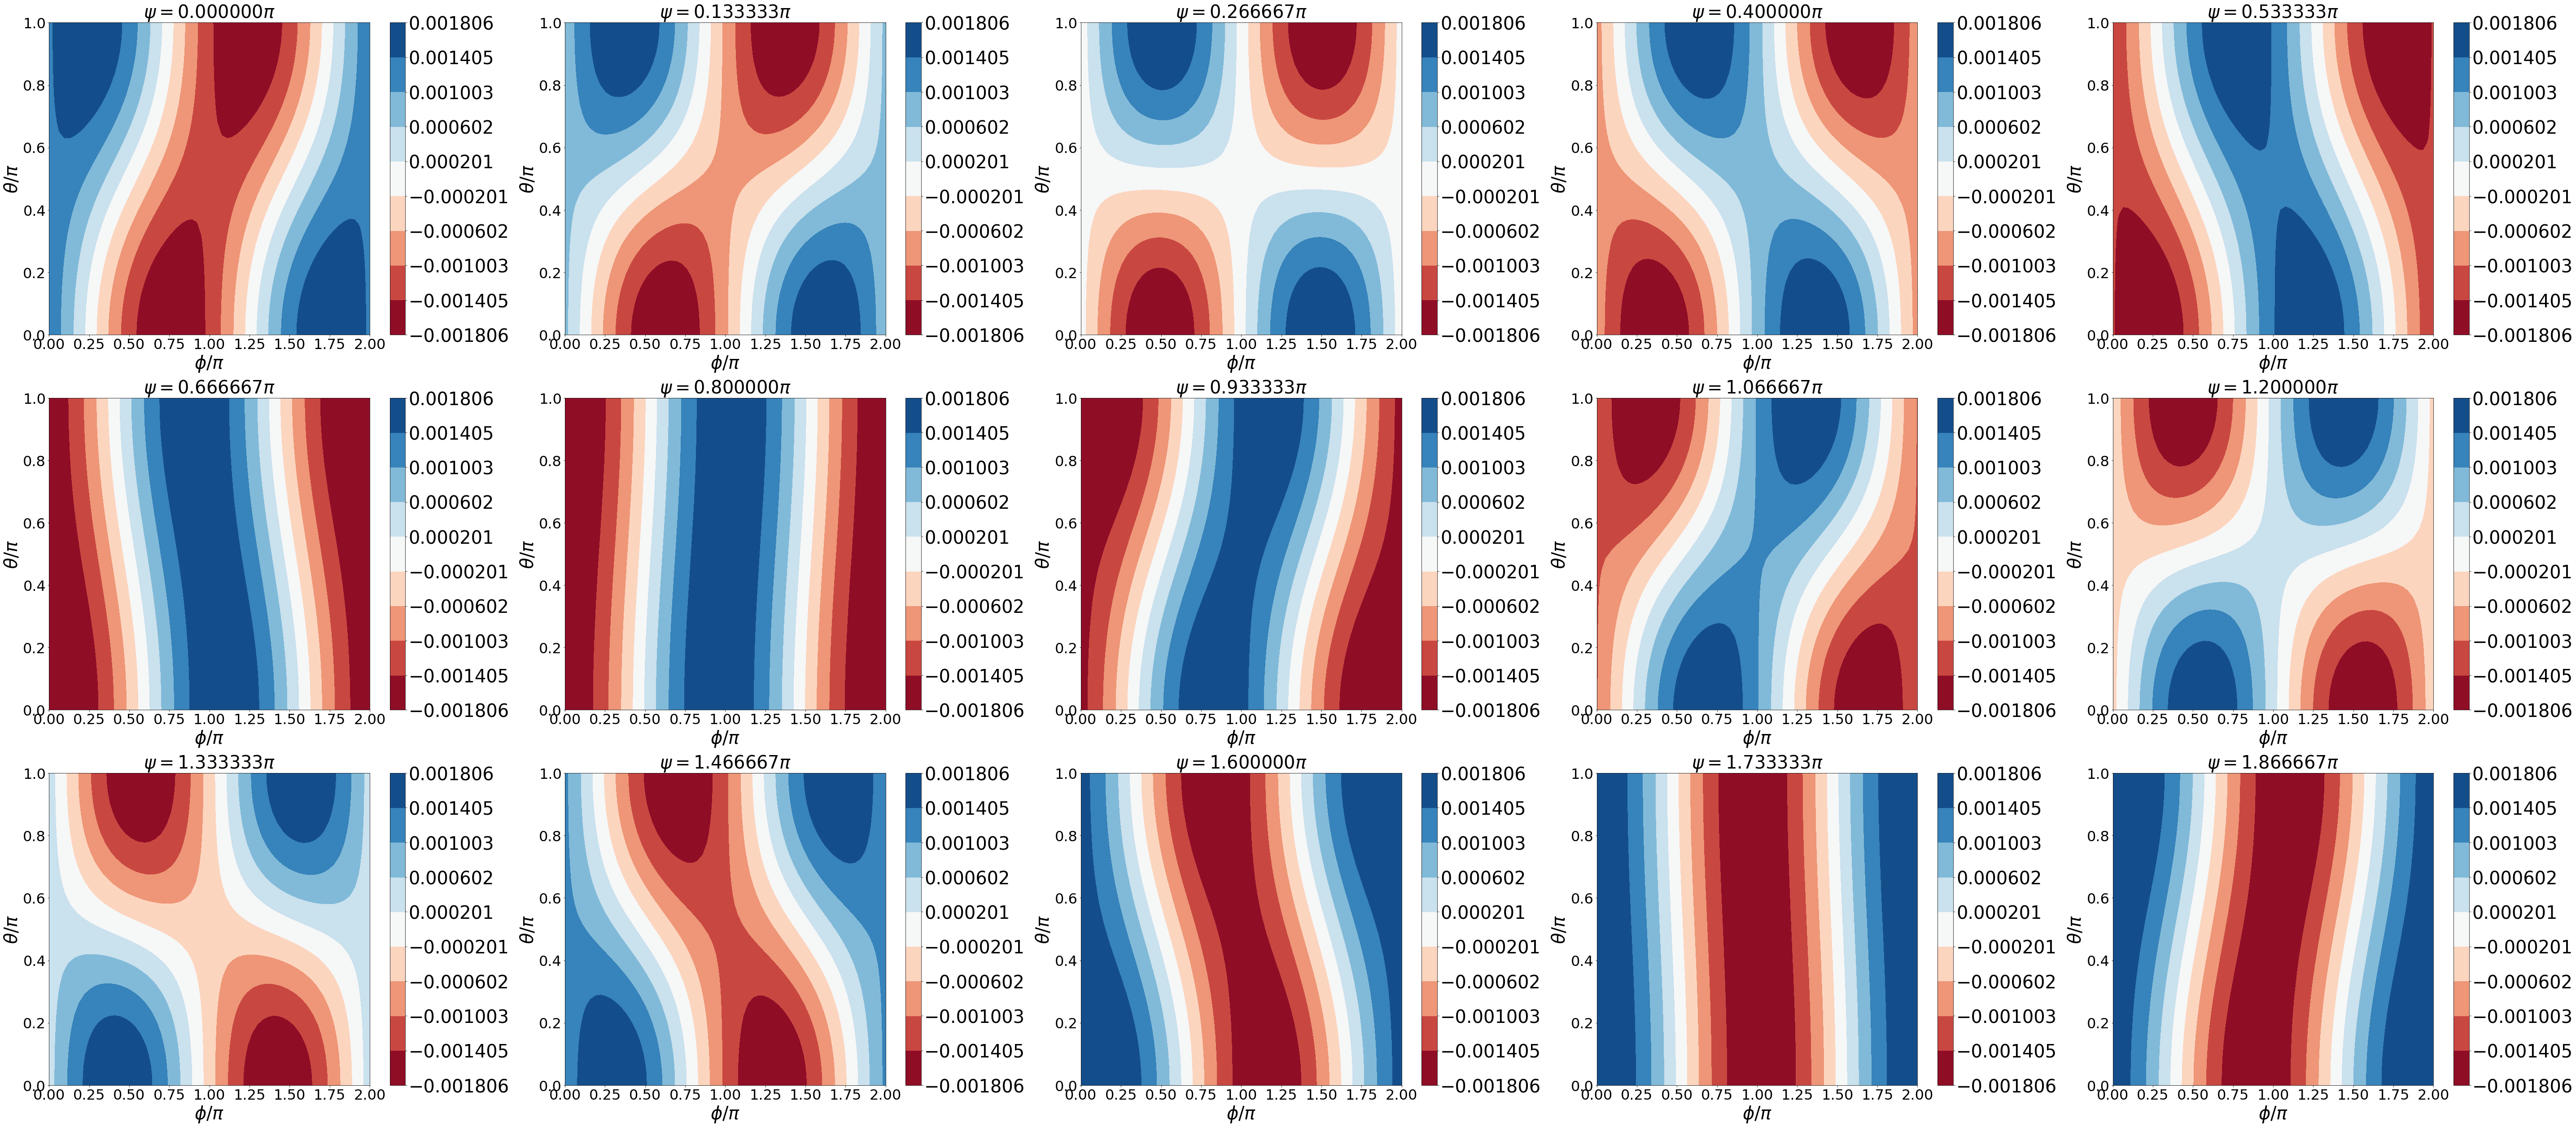

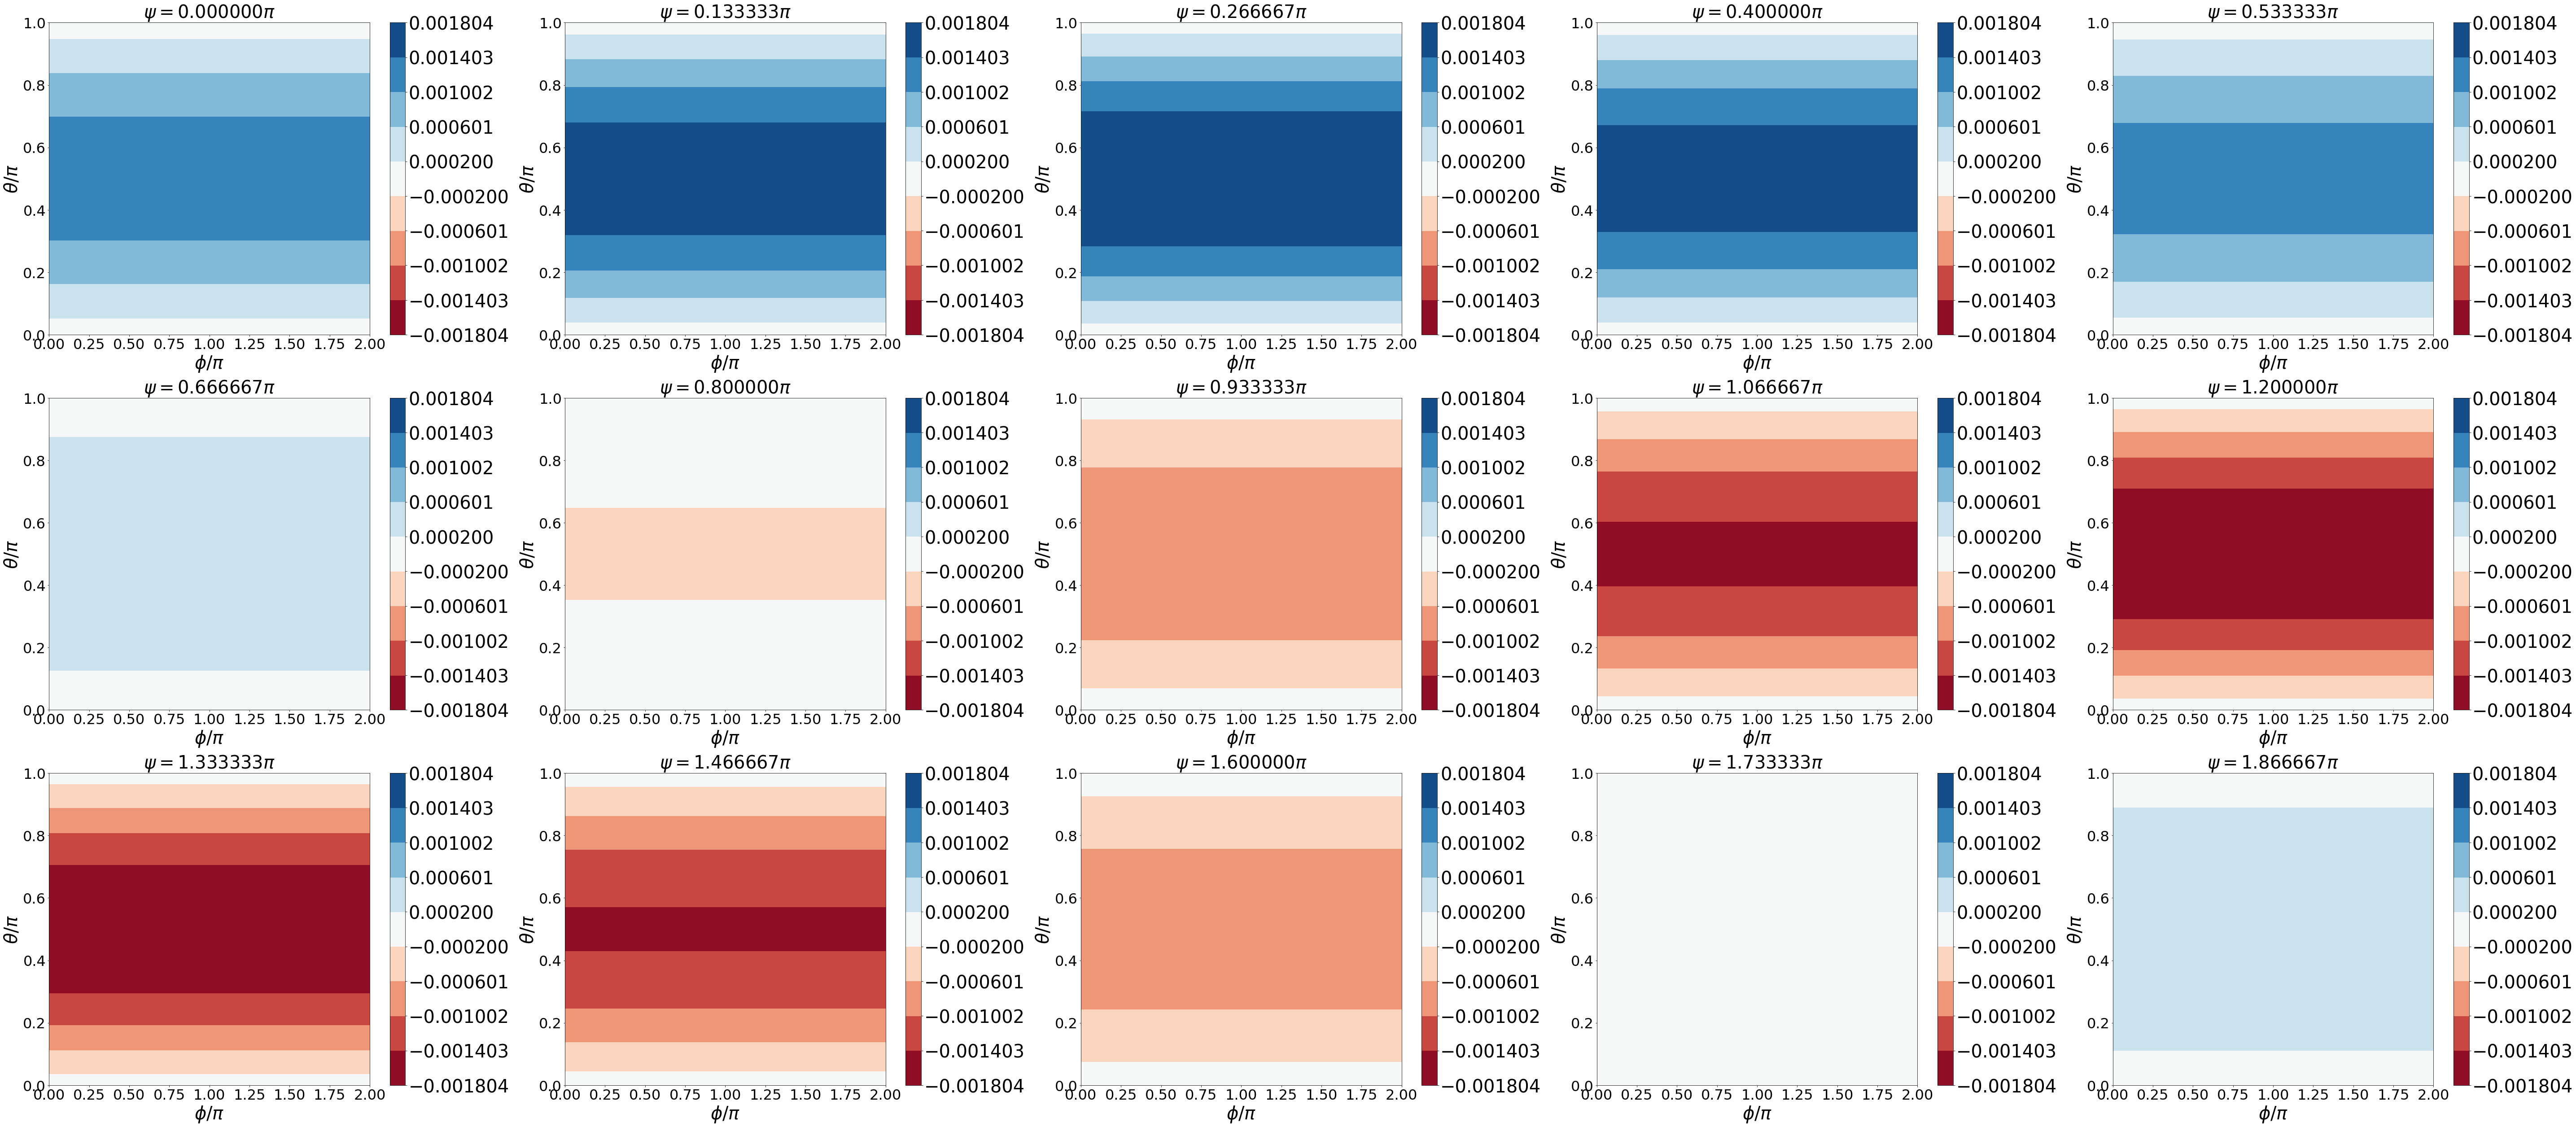

In [5]:
# show dPdt=w \times P of active swimmer in shear flow, here P is the norm of swimmer. 
atv_free_pickle = 'ecoC01B05_active'
show_dPdt_pickle(atv_free_pickle)

True

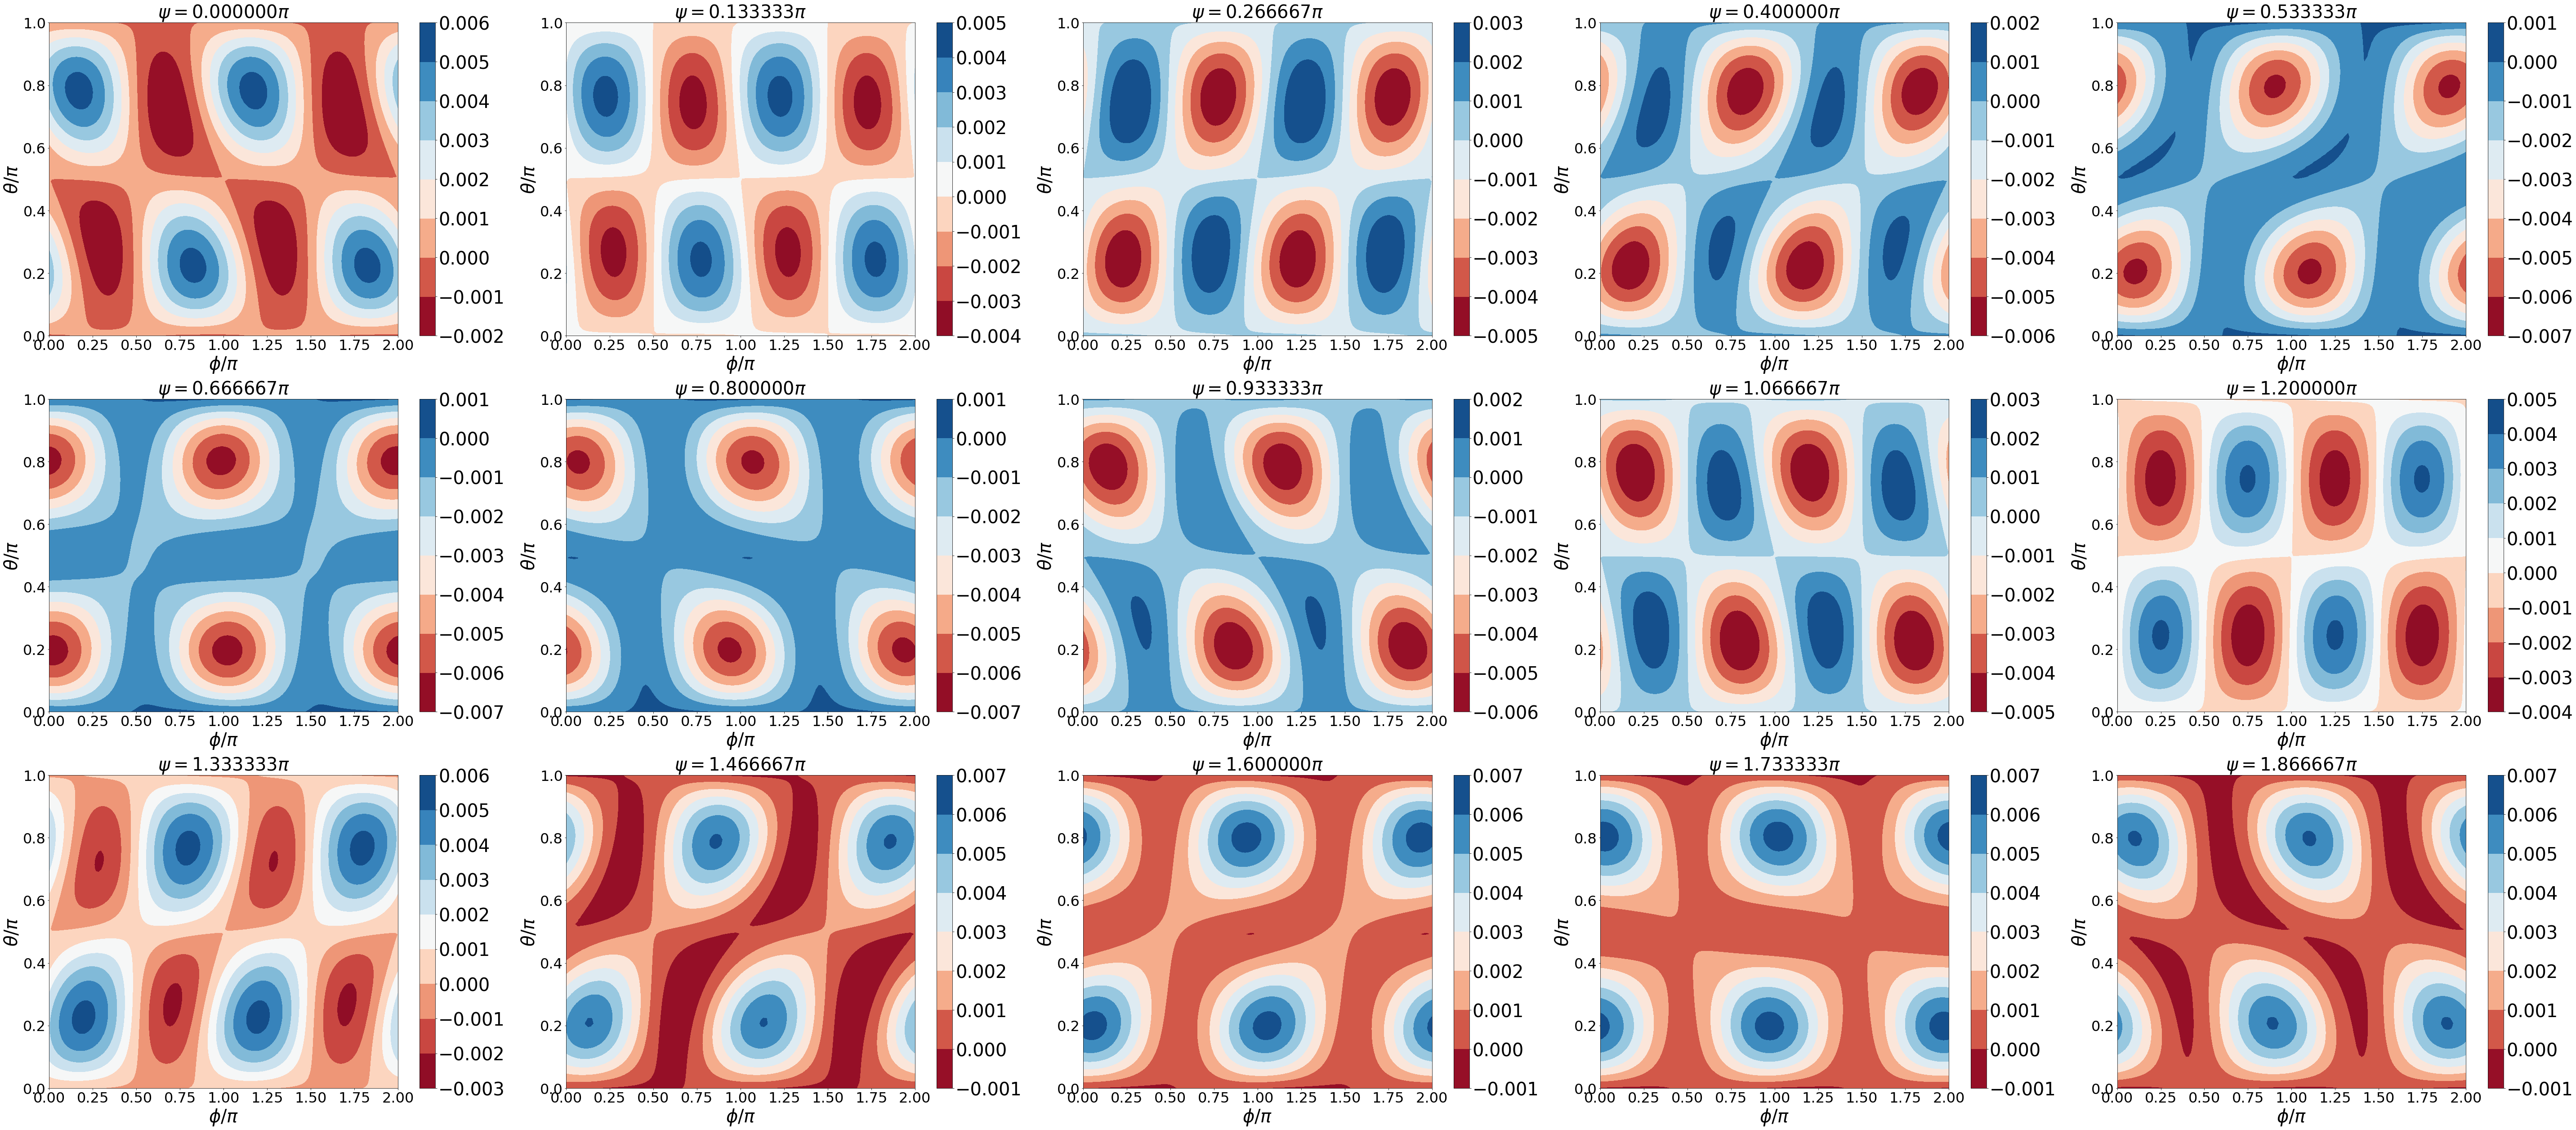

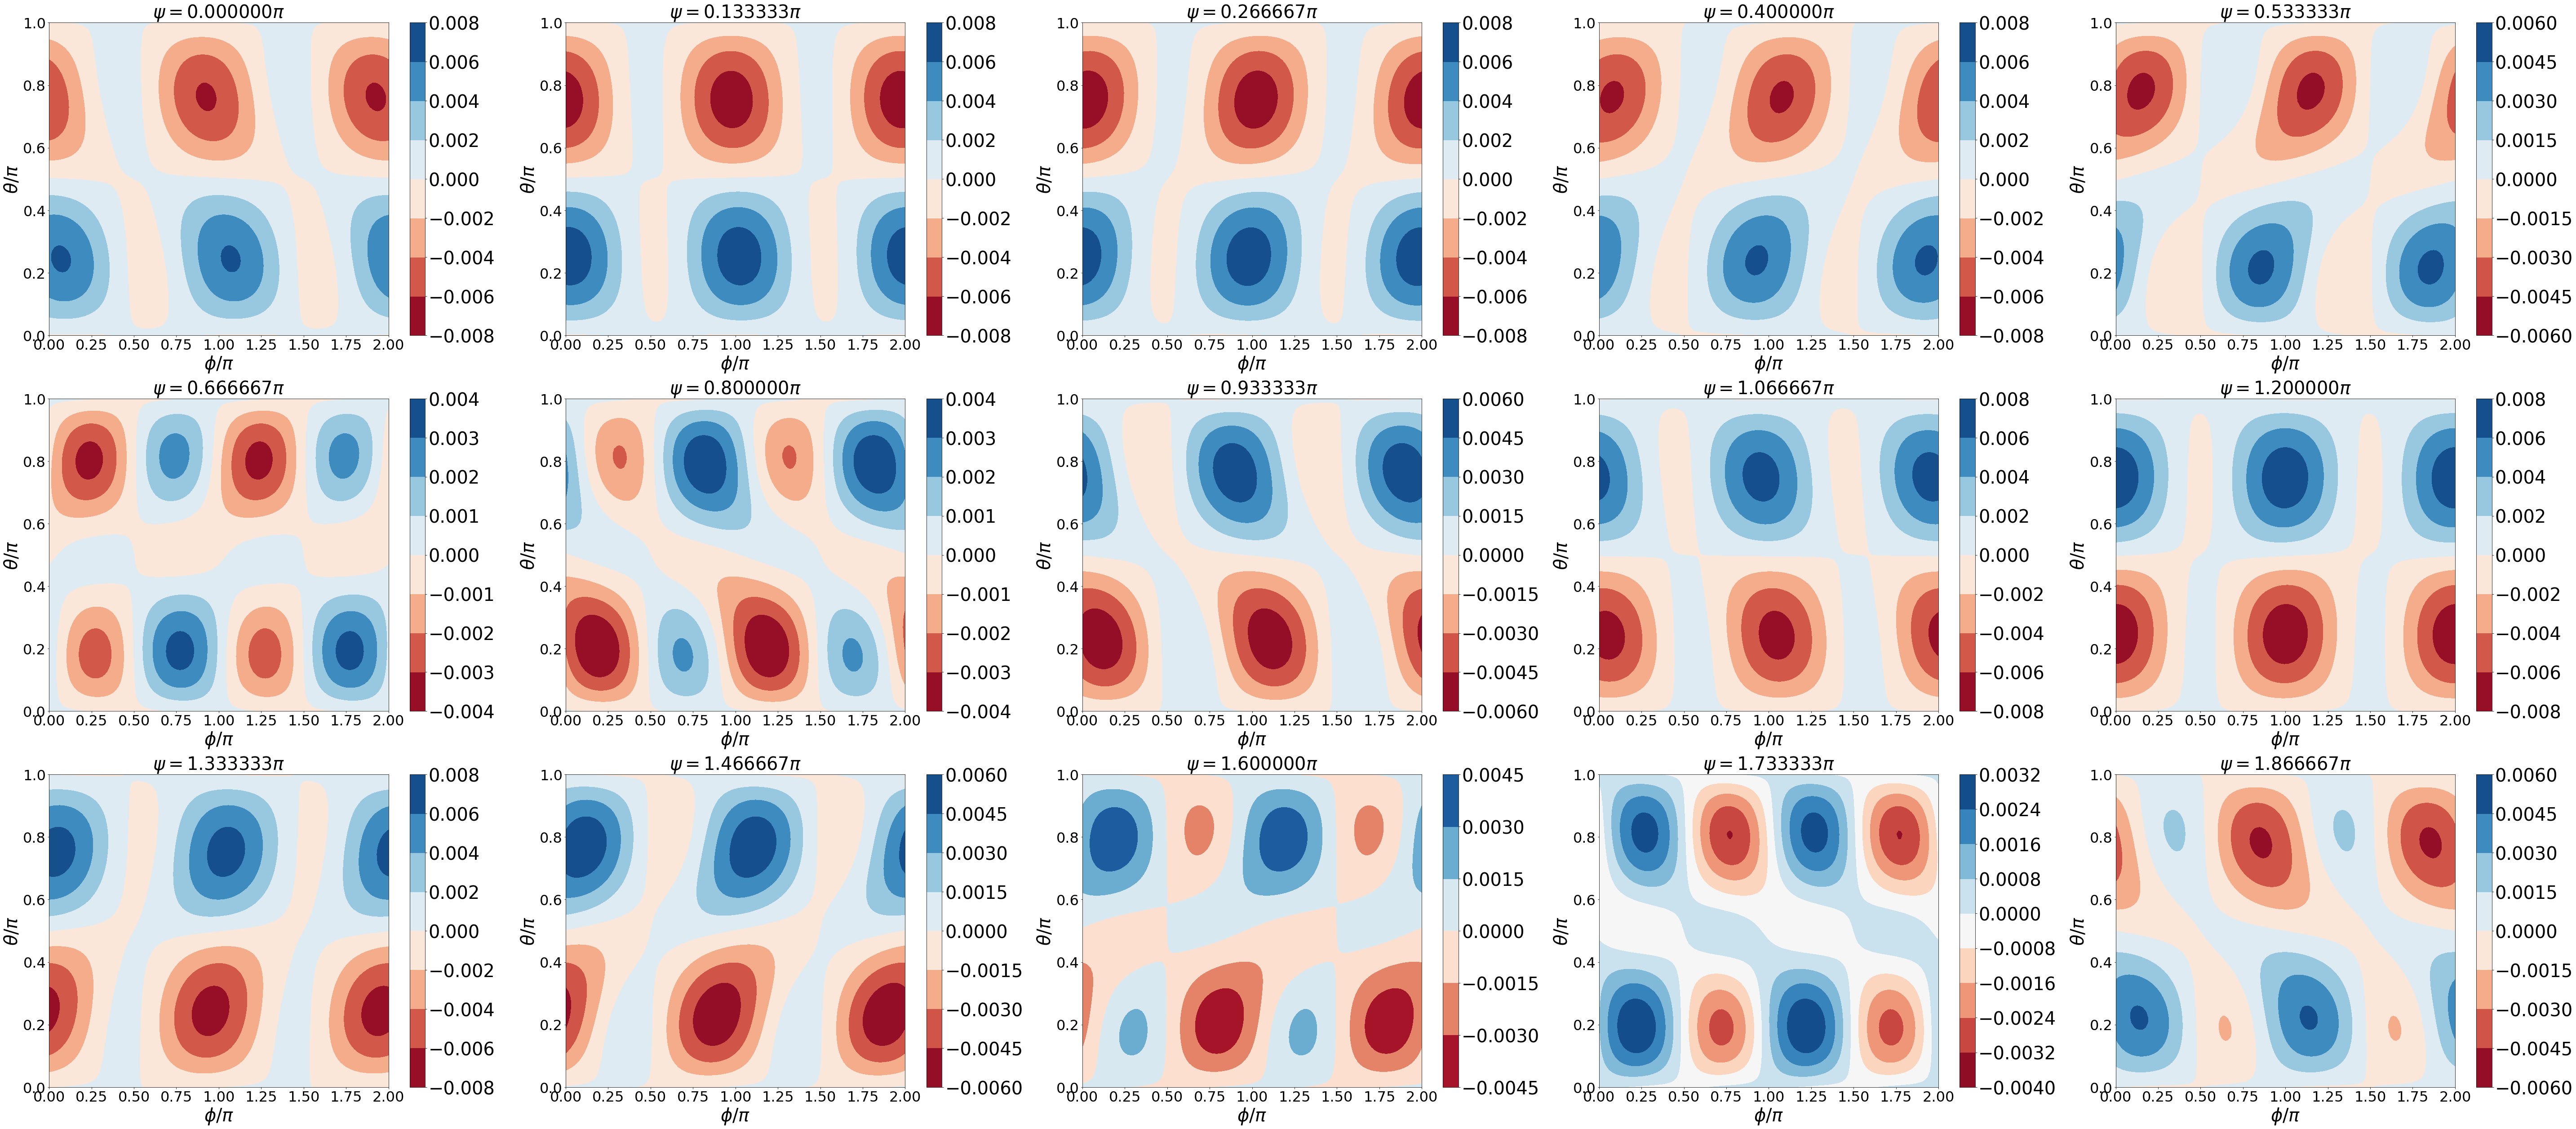

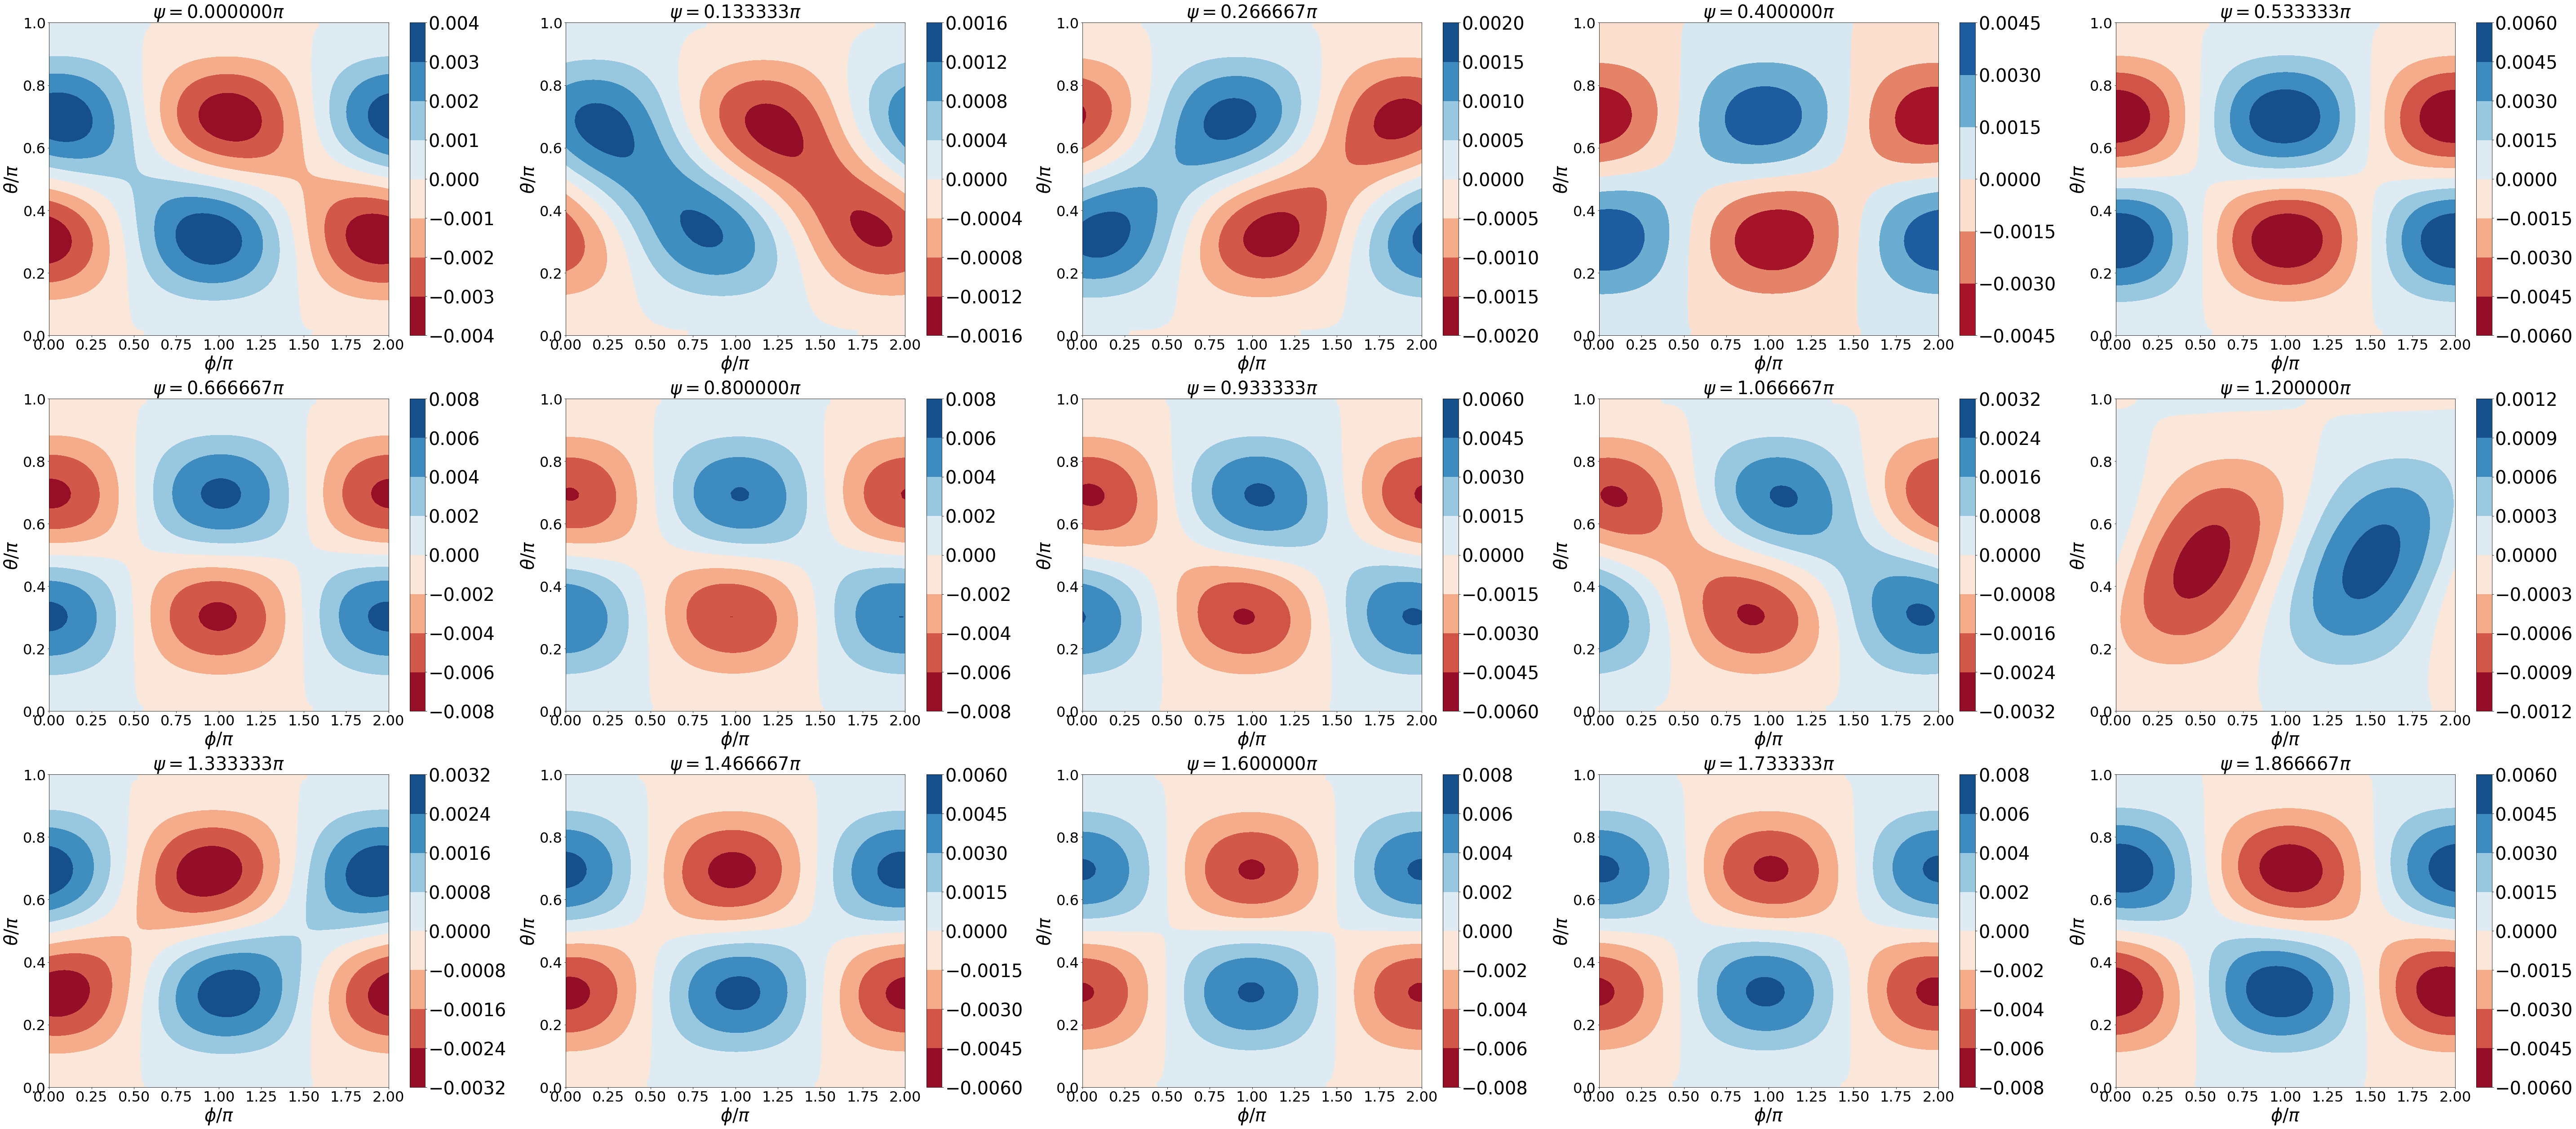

In [19]:
t_pickle = 'planeShearRatex_1d_passive'
show_dPdt_pickle(t_pickle)